In [48]:
import torch
import gc
from torchvision import transforms
from torchvision import models
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image

### Testing out PyTorch by using image classification

#### Retrieve image

In [49]:
# retrieve image
url = "https://i.insider.com/5fe4ebc0edf8920018093b7d?width=1000&format=jpeg&auto=webp"
fpath = "train.jpg"
urllib.request.urlretrieve(url,fpath)

('train.jpg', <http.client.HTTPMessage at 0x7fdc12297b80>)

#### Display Image

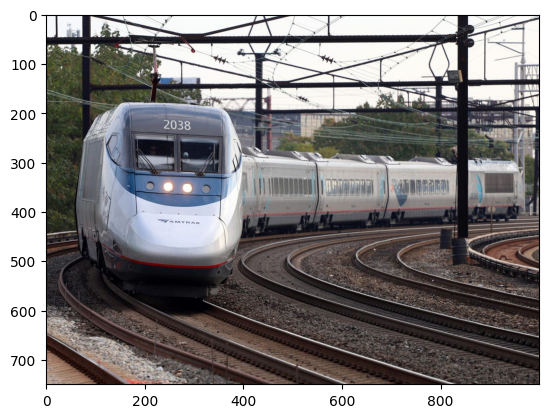

In [50]:
img = Image.open('train.jpg')
plt.imshow(img)

#### Pass the image into a pretrained neuraln network. We'll start by pre-processing the image since the neural network expects it to meet certain requirements

In [51]:
# Apply transforms so the image is formatted properly for the NN

# Basically, input the image as a Tensor (n-dimensional array of numbers) to the neural network

transform = transforms.Compose([
    ##transforms.Resize(300),
    #transforms.CenterCrop(147),
    transforms.ToTensor(),
    #transforms.Normalize(
     #   mean=[0.485, 0.456, 0.406],
      #  std=[0.310, 295, 0.301])
    ])

img_tensor = transform(img)

print('IMAGE TENSOR: {}', format(img_tensor))

# only one image, so batch size 1

batch = img_tensor.unsqueeze(0) #adds dimension to the tensor
print('BATCH: {}', format(batch.shape))


IMAGE TENSOR: {} tensor([[[0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9725, 0.9765],
         [0.9647, 0.9647, 0.9647,  ..., 0.9882, 0.9020, 0.7333],
         [0.9647, 0.9647, 0.9647,  ..., 0.7176, 0.6431, 0.7059],
         ...,
         [0.6784, 0.7098, 0.7333,  ..., 0.2392, 0.2745, 0.2745],
         [0.7451, 0.7451, 0.7451,  ..., 0.2588, 0.2588, 0.2039],
         [0.7569, 0.7412, 0.7216,  ..., 0.2431, 0.2353, 0.2314]],

        [[0.9686, 0.9686, 0.9686,  ..., 0.9804, 0.9882, 0.9922],
         [0.9686, 0.9686, 0.9686,  ..., 1.0000, 0.9176, 0.7490],
         [0.9686, 0.9686, 0.9686,  ..., 0.7255, 0.6510, 0.7137],
         ...,
         [0.6157, 0.6471, 0.6706,  ..., 0.1922, 0.2196, 0.2196],
         [0.6745, 0.6745, 0.6745,  ..., 0.2196, 0.2157, 0.1608],
         [0.6863, 0.6706, 0.6510,  ..., 0.2039, 0.1922, 0.1882]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9922, 0.9922, 0.9961],
         [0.9843, 0.9843, 0.9843,  ..., 1.0000, 0.9137, 0.7451],
         [0.9843, 0.9843, 0.9843,  ..., 0

#### Tensor size 1x3x147x147 represents a batch size of 1 and 3 channels for RGB values of 147x147 pixels </b>
#### Now classify the image with torchvision

In [52]:
torch.cuda.empty_cache()

gc.collect()

model = models.alexnet(pretrained=True)
device = "cuda" if torch.cuda.is_available() else "cpu"

# i dont need to use my GPU since it's one image but why not yeee haawwww

# configure AlexNet for inference and prediction as opposed to training
model.eval()
model.to(device)

# y consists of a batch of 1000 outputs. 
# First dimension is 1 since it's only 1 image while the number of classes 1000. 1 value for each class
# The higher the value the more likely it is that the image contains that class
y = model(batch.to(device))
print(y.shape)

y_max, index = torch.max(y,1)
print(index, y_max)


# Load file with class names
url = 'https://pytorch.tips/imagenet-labels'

fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)
with open('imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]

print(classes[index])

torch.Size([1, 1000])
tensor([466], device='cuda:0') tensor([6.4534], device='cuda:0', grad_fn=<MaxBackward0>)
466: 'bullet train, bullet',


#### Convert output values to probabilities

In [53]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

466: 'bullet train, bullet', 13.263233184814453
466: 'bullet train, bullet', 13.263233184814453
829: 'streetcar, tram, tramcar, trolley, trolley car', 4.895094394683838
705: 'passenger car, coach, carriage', 3.4472179412841797
547: 'electric locomotive', 3.0603795051574707
435: 'bathtub, bathing tub, bath, tub', 2.9957263469696045
